# Homework 8: Programming Exercises




Before you get started you might want to run the following cell (and potentially add your own import lines to it later on):

In [1]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
from collections import Counter

## Exercise 1
Each day, around midday, a long line forms at the Warren Tower Subway. People line up to get their favorite lunch options. The time (in minutes) it takes to make and sell a sub depends on the type of order, and we model it as a real number chosen uniformly and independently at random from the interval [0,15]. For simplicity, we will assume that only one order is processed at a time, and that each order is placed in the exact moment in which the previous sub is ready. 

Let $X$ be the random variable equal to the number of people that place an order in 15 minutes.

<b>Example:</b> If the first person's sub takes 4.3 minutes to make, the second person's sub takes 7.7 minutes, and the third person's sub takes 4.475 minutes, then $X = 3$ (even if the third person's sub is not done in the 15 minute window).

Write a function that empirically estimates $\mathrm{Ex}(X)$. Use a sufficiently large number of trials (e.g., 10000) and have your function return the estimated value.

In [2]:
# Your solution here
def estimate_expected_orders(num_trials=10000):
    X_total = 0
    trials_counter = 1
    for trials in range(num_trials):
        time_used = 0.00
        counter_X = 0
        while time_used < 15.00:
            time_type = np.random.uniform(0, 15)
            time_used += time_type
            counter_X += 1
        X_total += counter_X
        trials_counter += 1
    Ex_X = X_total / num_trials
    return Ex_X

print(estimate_expected_orders())

2.7256


## Exercise 2

You invest in a stock originally worth $\$ 0$. The value of the stock goes up or down by exactly $\$ 1$ each day with equal probability, potentially going in the negatives. Let $S_i$ be the value of the stock on day $i$. We track the value of the stock for a year (365 days). Note that at the end of the year, the value $S_{365}$ is some integer number between -365 and 365.

Let $P$ be the number of days $i$ in which $S_i >0$. Note that $P$ is some integer between 0 and 365.

<b>Think:</b> what do you think the distribution of $P$ looks like?

In this exercise we will answer this question via simulation.

### Exercise 2(a)
Write a function that gives you the increment in stock value in a day.

In [3]:
# Your code here

def one_day_stock_increase():
    # returns +/- 1 with probability 1/2
    possible_outcomes = [-1, 1]
    return np.random.choice(possible_outcomes, size = 1, p = [0.5, 0.5])

### Exercise 2(b)

Write a function that keeps track of the value $S_i$ of the stock every day for one year, and counts the number of days in which $S_i$ is positive.

In [4]:
# Your code here

def number_of_positive_days_in_year():
    # Simulates the stock value for a year by calling the above function 365 times 
    # and adding the new change each time.
    # Counts and returns the value of P, the number of days in which the stock value is positive.
    stock_value = 0
    P = 0
    for days in range(365):
        change_value = one_day_stock_increase()
        stock_value += change_value
        if stock_value > 0:
            P += 1
    return P

### Exercise 2(c)

Estimate the PDF of $P$ by running the above function multiple times and plotting the histogram of results. The code for plotting is provided for you below.

In [5]:
# helper function to plot the empirical distribution as a bar chart
# here we are only displaying a subset of the x-labels
#   since otherwise the x-labels would not be readable
def plot_results(results, title, num_labels = 10):
    summary = Counter(results)
    x = [i for i in range(min(results),max(results)+1) if summary[i] != 0]
    y = [summary[i]/ len(results) for i in x]
    
    # the xvalues are displayed at positions 0, 1, 2, ...
    plt.bar(np.arange(len(x)), y, align='center')
    
    # display a small number of x-labels
    xinc = (int) (len(x) / num_labels)
    xcoords = [i * xinc for i in range(num_labels) if i * xinc < len(x) - 1]
    xcoords.append(len(x) - 1) # also add the maximum value
    xlabels = [x[i] for i in xcoords]
    
    plt.xticks(xcoords, xlabels)
    plt.title(title)
    plt.show()

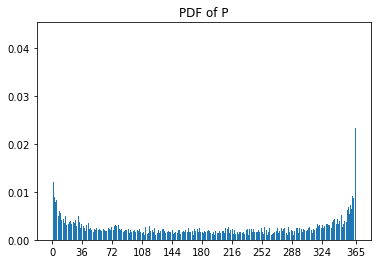

In [6]:
# Your code here

def estimate_P(num_trials=10000):
    # runs the above function num_trials times and plots the histogram of results
    results = []
    title = "PDF of P"
    for trails in range(num_trials):
        results.append(number_of_positive_days_in_year())
    plot_results(results, title, num_labels = 10)
    
estimate_P()

<b>Think:</b> Was this the result you expected?

In [ ]:
# It's a little different from my expectation. 
# I expected that numbers around 0 would be a lot, 
# but I didn't expect that numbers around 365 would be this many also.